In [1]:
'''' Hypothesis Generation
Hypothesis generation helps us to point out the factors which might affect our dependent variable. 
Below are some of the hypotheses which I think can affect the passenger count(dependent variable for this time series problem)
on the JetRail:

There will be an increase in the traffic as the years pass by.
Explanation - Population has a general upward trend with time, so I can expect more people to travel by JetRail. 
Also, generally companies expand their businesses over time leading to more customers travelling through JetRail.

The traffic will be high from May to October.
Explanation - Tourist visits generally increases during this time period.

Traffic on weekdays will be more as compared to weekends/holidays.
Explanation - People will go to office on weekdays and hence the traffic will be more

Traffic during the peak hours will be high.
Explanation - People will travel to work, college.

We will try to validate each of these hypothesis '''


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error

In [2]:
train_original=pd.read_csv("C:\\Users\\User\\Downloads\\Train_Time.csv")
test_original=pd.read_csv("C:\\Users\\User\\Downloads\\Test_Time.csv")

In [3]:
train_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18288 entries, 0 to 18287
Data columns (total 3 columns):
ID          18288 non-null int64
Datetime    18288 non-null object
Count       18288 non-null int64
dtypes: int64(2), object(1)
memory usage: 428.7+ KB


In [4]:
# converting date object to DateTime format
test_original['Datetime'] = pd.to_datetime(test_original.Datetime,format='%d-%m-%Y %H:%M')
train_original['Datetime'] = pd.to_datetime(train_original.Datetime,format='%d-%m-%Y %H:%M')

In [5]:
train_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18288 entries, 0 to 18287
Data columns (total 3 columns):
ID          18288 non-null int64
Datetime    18288 non-null datetime64[ns]
Count       18288 non-null int64
dtypes: datetime64[ns](1), int64(2)
memory usage: 428.7 KB


In [6]:
for i in(test_original, train_original):
    i['year']=i.Datetime.dt.year 
    i['month']=i.Datetime.dt.month 
    i['day']=i.Datetime.dt.day
    i['hour']=i.Datetime.dt.hour

In [8]:
train_original['day of week']=train_original['Datetime'].dt.dayofweek
train_original.head()

,ID,Datetime,Count,year,month,day,hour,day of week
0,0,2012-08-25 00:00:00,8,2012,8,25,0,5
1,1,2012-08-25 01:00:00,2,2012,8,25,1,5
2,2,2012-08-25 02:00:00,6,2012,8,25,2,5
3,3,2012-08-25 03:00:00,2,2012,8,25,3,5
4,4,2012-08-25 04:00:00,2,2012,8,25,4,5


In [9]:
# Let’s assign 1 if the day of week is a weekend and 0 if the day of week in not a weekend. 
# Days with 5(Sat) or 6(Sun) are weekend
train_original['weekend']= train_original['day of week'].apply(lambda x: 1 if x==5 or x==6 else 0)

In [10]:
train_original.head()

,ID,Datetime,Count,year,month,day,hour,day of week,weekend
0,0,2012-08-25 00:00:00,8,2012,8,25,0,5,1
1,1,2012-08-25 01:00:00,2,2012,8,25,1,5,1
2,2,2012-08-25 02:00:00,6,2012,8,25,2,5,1
3,3,2012-08-25 03:00:00,2,2012,8,25,3,5,1
4,4,2012-08-25 04:00:00,2,2012,8,25,4,5,1


'\nHere we can infer that there is an increasing trend in the series, i.e., the number of count is increasing with respect to time. \nWe can also see that at certain points there is a sudden increase in the number of counts. The possible reason behind this could \nbe that on particular day, due to some event the traffic was high.\n'

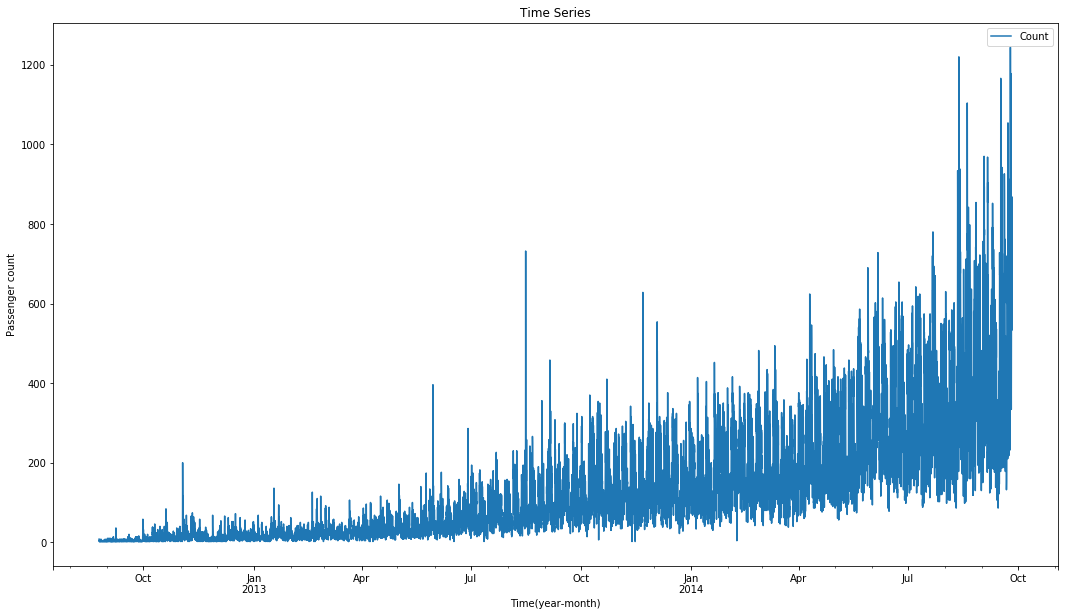

In [11]:
df=train_original.drop('ID', axis=1)
df.plot(x='Datetime', y='Count', figsize=(18, 10))
plt.title('Time Series')
plt.xlabel("Time(year-month)")
plt.ylabel("Passenger count")
plt.legend(loc='best')
'''
Here we can infer that there is an increasing trend in the series, i.e., the number of count is increasing with respect to time. 
We can also see that at certain points there is a sudden increase in the number of counts. The possible reason behind this could 
be that on particular day, due to some event the traffic was high.
'''

In [ ]:
# Lets recall the hypothesis that we made earlier:
# Traffic will increase as the years pass by
# Traffic will be high from May to October
# Traffic on weekdays will be more
# Traffic during the peak hours will be high
# let's verify it using EDA

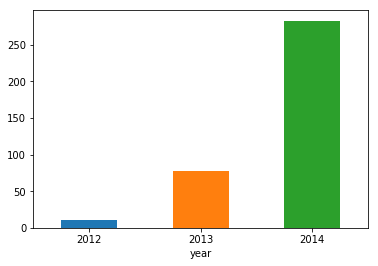

In [12]:
df.groupby('year').Count.mean().plot(kind='bar', rot=0)# Traffic is incrasing by year

'\nHere we see a decrease in the mean of passenger count in last three months. This does not look right. \nLet’s look at the monthly mean of each year separately.\n'

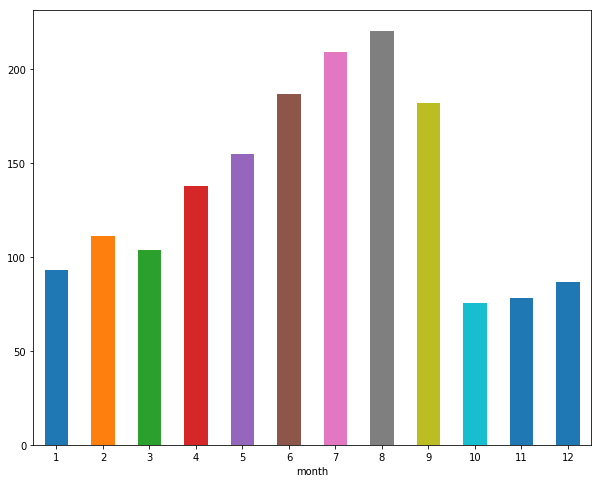

In [13]:
df.groupby('month').Count.mean().plot(kind='bar', figsize=(10, 8), rot=0)
'''
Here we see a decrease in the mean of passenger count in last three months. This does not look right. 
Let’s look at the monthly mean of each year separately.
'''

'\nWe see that the months 10, 11 and 12 are not present for the year 2014 and the \nmean value for these months in year 2012 is very less.\nSince there is an increasing trend in our time series, the mean value for rest of the months will be \nmore because of their larger passenger counts in year 2014 and we will get smaller value for these 3 months.\n'

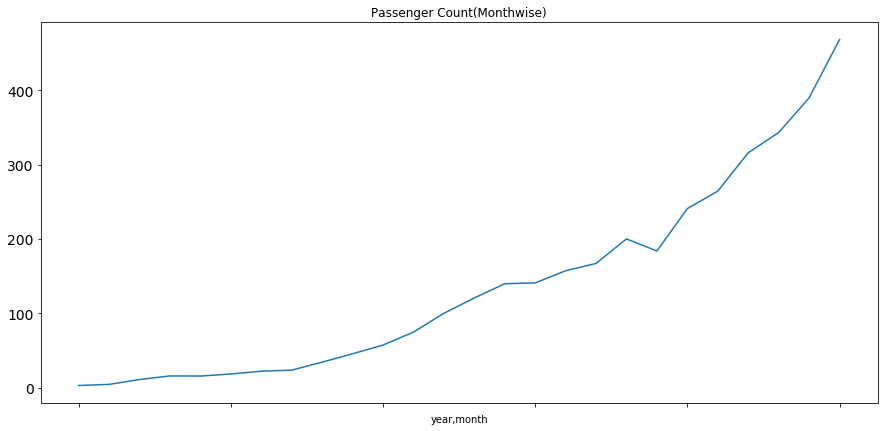

In [14]:
train_original.index= train_original['Datetime']
ax=train_original.groupby(['year', 'month'])['Count']
ax.mean().plot(figsize=(15,7), title= 'Passenger Count(Monthwise)', fontsize=14)
'''
We see that the months 10, 11 and 12 are not present for the year 2014 and the 
mean value for these months in year 2012 is very less.
Since there is an increasing trend in our time series, the mean value for rest of the months will be 
more because of their larger passenger counts in year 2014 and we will get smaller value for these 3 months.
'''

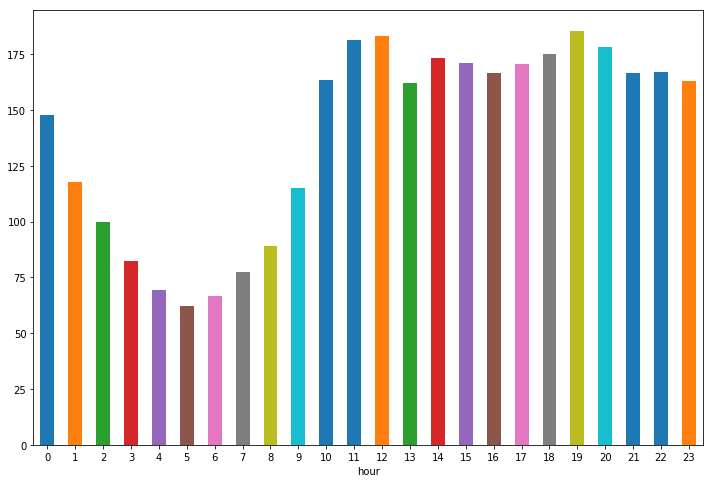

In [18]:
df.groupby('hour')['Count'].mean().plot(kind='bar', figsize=(12,8), rot=0) #traffic is High during peak-hours(9-12, 17-19 )

In [ ]:
df.groupby('weekend')['Count'].mean().plot(kind='bar', figsize=(8,8), rot=0)# TRaffic is low at weekends

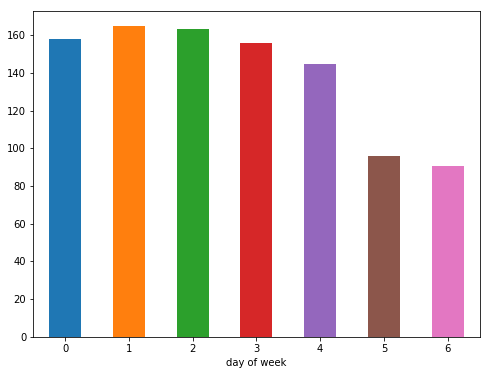

In [19]:
df.groupby('day of week')['Count'].mean().plot(kind='bar', figsize=(8,6), rot=0)# Again, traffic is decreasing on weekends

In [20]:
'''
1)  Splitting the data into training and validation part
    Now we will divide our data in train and validation. We will make a model on the train part and 
    predict on the validation part to check the accuracy of our predictions.

To divide the data into training and validation set, we will take last 3 months as the validation data and rest 
for training data. We will take only 3 months as the trend will be present most in them. If we take more than 3 months 
for the validation set, our training set will have less data points as the total duration is of 25 months. 
So, it will be a good choice to take 3 months for validation set.

The starting date of the dataset is 25-08-2012 as we have seen in the exploration part and the end date is 25-09-2014.
'''
import datetime as dt
train=df[df.Datetime<=dt.date(2014, 6, 24)]
valid=df[df.Datetime>dt.date(2014, 6, 24)]
train.index=train['Datetime']
valid.index=valid['Datetime']
valid.head()

,Datetime,Count,year,month,day,hour,day of week,weekend
Datetime,,,,,,,,
2014-06-24 01:00:00,2014-06-24 01:00:00,318,2014,6,24,1,1,0
2014-06-24 02:00:00,2014-06-24 02:00:00,306,2014,6,24,2,1,0
2014-06-24 03:00:00,2014-06-24 03:00:00,250,2014,6,24,3,1,0
2014-06-24 04:00:00,2014-06-24 04:00:00,148,2014,6,24,4,1,0
2014-06-24 05:00:00,2014-06-24 05:00:00,168,2014,6,24,5,1,0


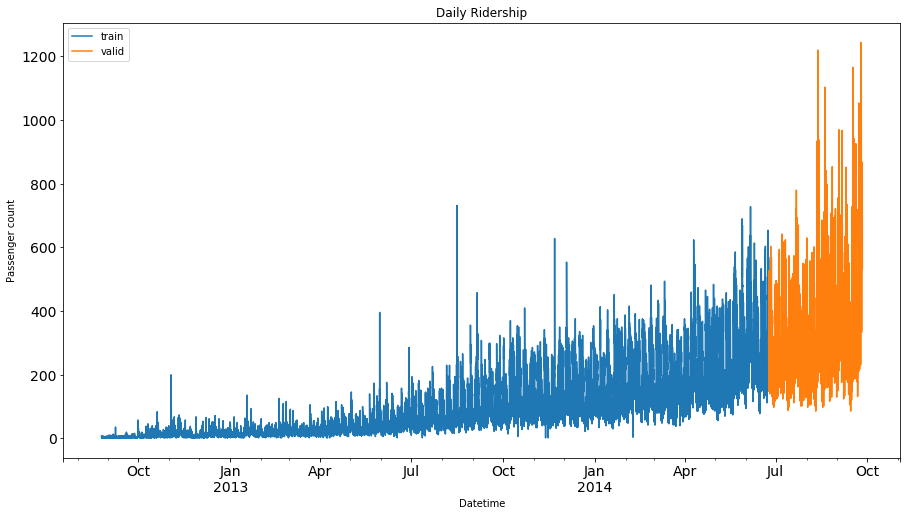

In [21]:
train.Count.plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14, label='train')
valid.Count.plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14, label='valid')
plt.xlabel("Datetime")
plt.ylabel("Passenger count")
plt.legend(loc='best')
plt.show()

In [22]:
y_pred=valid.copy()

In [ ]:
'''
(i)Naive Approach
In this forecasting technique, we assume that the next expected point is equal to the last observed point. 
So we can expect a straight horizontal line as the prediction. Lets understand it with an example and an image:
'''


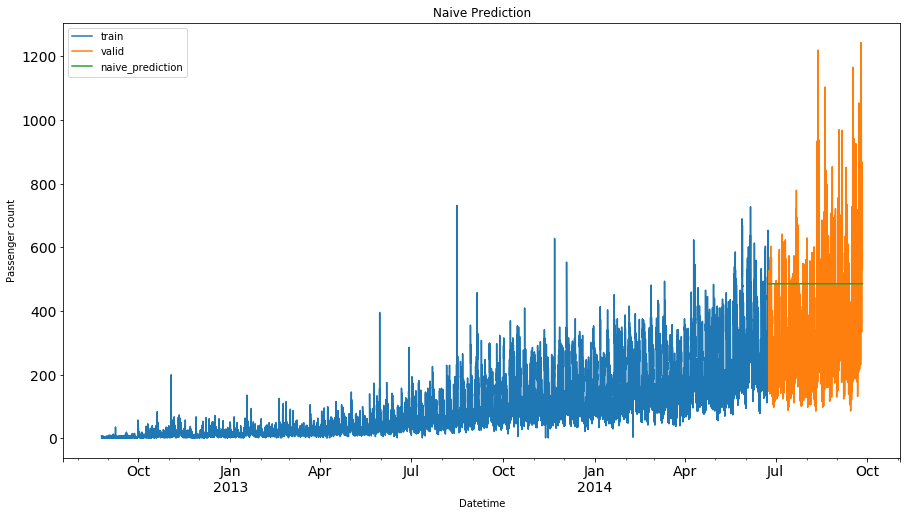

In [23]:
y_pred['naive']=train.iloc[-1, 1]# Doing Naive prediction. last value of 'Count'  coloumn in train dataset (332) is used
train.Count.plot(figsize=(15,8), fontsize=14, label='train')
valid.Count.plot(figsize=(15,8), fontsize=14, label='valid')
y_pred.naive.plot(figsize=(15,8), fontsize=14, label='naive_prediction')
plt.xlabel("Datetime")
plt.ylabel("Passenger count")
plt.legend(loc='best')
plt.title("Naive Prediction")
plt.show()

In [24]:
import math
rmse=math.sqrt(mean_squared_error(valid.Count, y_pred.naive))
print('RMSE Naive=', rmse)
print("predicted value=", train.iloc[-1, 1])

RMSE Naive= 209.56008827701334
predicted value= 486


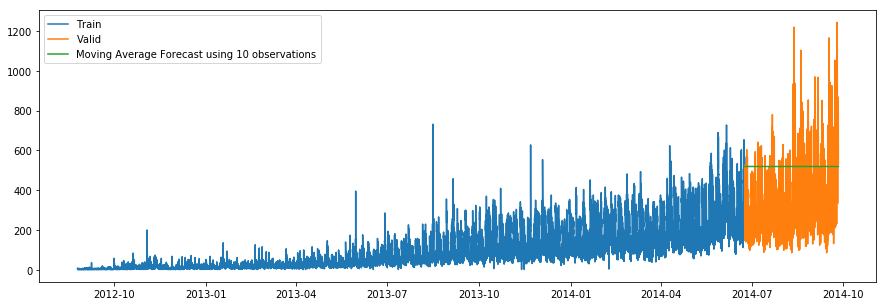

RMSE 10= 227.0639828950414
predicted value= 519.6


In [25]:
'''
(ii) Moving Average- In this technique we will take the average of the passenger counts for last few time periods only.
     Here we wil use moving averages for 10, 40 ,80 days and calculate RMSE for each.
'''
y_pred['moving_avg_forecast10'] = train['Count'].rolling(10).mean().iloc[-1] # average of last 10 observations.
plt.figure(figsize=(15,5)) 
plt.plot(train['Count'], label='Train')
plt.plot(valid['Count'], label='Valid')
plt.plot(y_pred['moving_avg_forecast10'], label='Moving Average Forecast using 10 observations')
plt.legend(loc='best')
plt.show()
rmse=math.sqrt(mean_squared_error(valid.Count, y_pred['moving_avg_forecast10']))
print('RMSE 10=', rmse)
print("predicted value=", train['Count'].rolling(10).mean().iloc[-1])

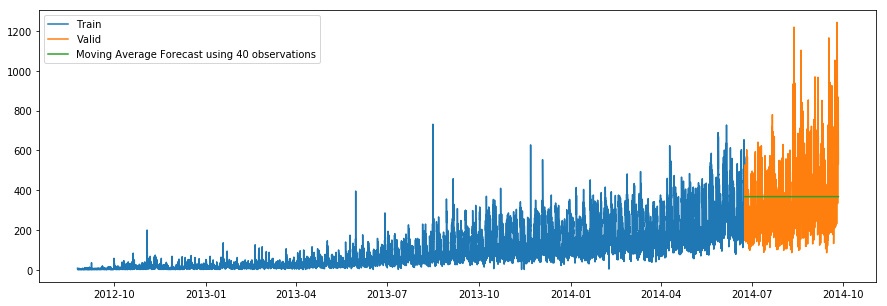

RMSE 40= 186.99246108983803
predicted value= 367.95


In [32]:
y_pred['moving_avg_forecast40'] = train['Count'].rolling(40).mean().iloc[-1] # average of last 40 observations.
plt.figure(figsize=(15,5)) 
plt.plot(train['Count'], label='Train')
plt.plot(valid['Count'], label='Valid')
plt.plot(y_pred['moving_avg_forecast40'], label='Moving Average Forecast using 40 observations')
plt.legend(loc='best')
plt.show()
rmse=math.sqrt(mean_squared_error(valid.Count, y_pred['moving_avg_forecast40']))
print('RMSE 40=',rmse)
print("predicted value=", train['Count'].rolling(40).mean().iloc[-1])

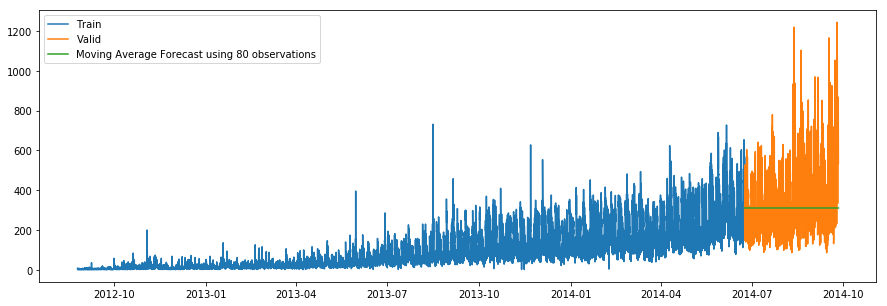

RMSE 80= 201.54159184001693
predicted value= 310.975


In [33]:
y_pred['moving_avg_forecast80'] = train['Count'].rolling(80).mean().iloc[-1] # average of last 80 observations.
plt.figure(figsize=(15,5)) 
plt.plot(train['Count'], label='Train')
plt.plot(valid['Count'], label='Valid')
plt.plot(y_pred['moving_avg_forecast80'], label='Moving Average Forecast using 80 observations')
plt.legend(loc='best')
plt.show()
rmse=math.sqrt(mean_squared_error(valid.Count, y_pred['moving_avg_forecast80']))
print('RMSE 80=', rmse)
print("predicted value=", train['Count'].rolling(80).mean().iloc[-1])

In [ ]:
'''
(iii)Simple Exponential Smoothing 
In this technique, we assign larger weights to more recent observations than to observations from the distant past.
The weights decrease exponentially as observations come from further in the past, the smallest weights are associated
with the oldest observations.
NOTE - If we give the entire weight to the last observed value only, this method will be similar to the naive approach. 
So, we can say that naive approach is also a simple exponential smoothing technique where the entire weight is given to 
the last observed value.
'''

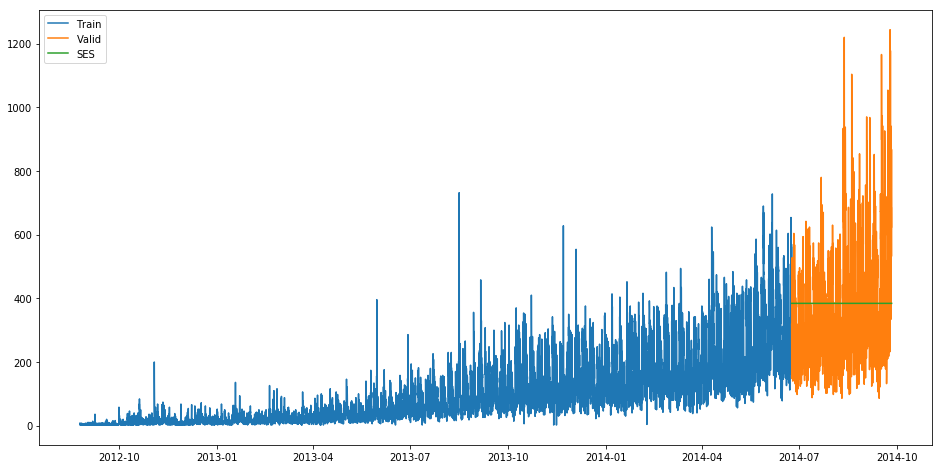

RMSE SES= 185.85783132924072
predicted value= 384.27166598188404


In [26]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing,Holt
fit2 = SimpleExpSmoothing(np.asarray(train['Count'])).fit(smoothing_level=0.04, optimized=False)
y_pred['SES'] = fit2.forecast(len(valid))
plt.figure(figsize=(16,8))
plt.plot(train['Count'], label='Train')
plt.plot(valid['Count'], label='Valid')
plt.plot(y_pred['SES'], label='SES')
plt.legend(loc='best')
plt.show()
rmse=math.sqrt(mean_squared_error(valid.Count, y_pred['SES']))
print('RMSE SES=', rmse)
print('predicted value=', y_pred['SES'][0])

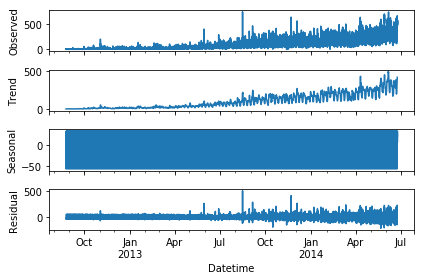

In [45]:
'''
We can decompose the time series in four parts.

Observed, which is the original time series.
Trend, which shows the trend in the time series, i.e., increasing or decreasing behaviour of the time series.
Seasonal, which tells us about the seasonality in the time series.
Residual, which is obtained by removing any trend or seasonality in the time series.
'''

import statsmodels.api as sm
sm.tsa.seasonal_decompose(train.Count).plot()
plt.figure(figsize=(100, 100))
result = sm.tsa.stattools.adfuller(train.Count)
plt.show()

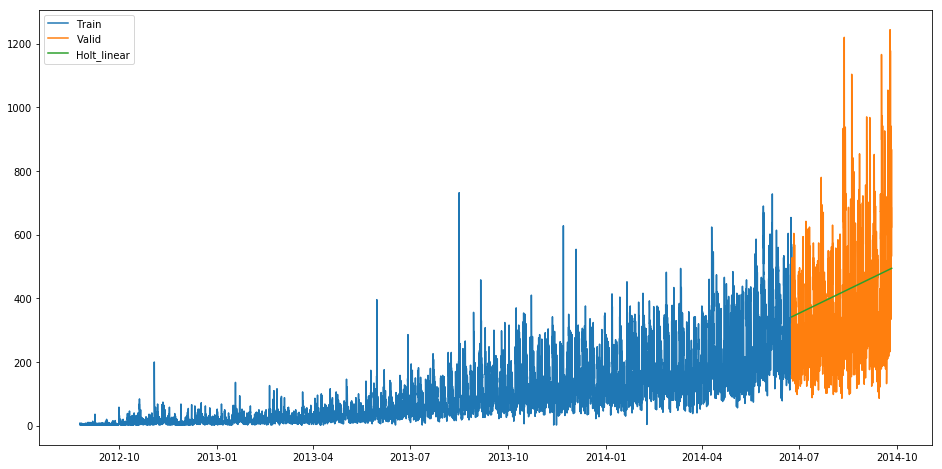

RMSE Holt_Linear= 179.63557558851025


In [31]:
'''
iv) Holt’s Linear Trend Model
It is an extension of simple exponential smoothing to allow forecasting of data with a trend.
This method takes into account the trend of the dataset. The forecast function in this method is a function of level and trend.
'''
fit1 = Holt(np.asarray(train['Count'])).fit(smoothing_level = 0.02, smoothing_slope = 0.001)
y_pred['Holt_linear'] = fit1.forecast(len(valid))

plt.figure(figsize=(16,8))
plt.plot(train['Count'], label='Train')
plt.plot(valid['Count'], label='Valid')
plt.plot(y_pred['Holt_linear'], label='Holt_linear')
plt.legend(loc='best')
plt.show()
rmse=math.sqrt(mean_squared_error(valid.Count, y_pred['Holt_linear']))
print('RMSE Holt_Linear=', rmse)

In [104]:
y_pred.head()

,Datetime,Count,year,month,day,hour,day of week,weekend,naive,moving_avg_forecast10,SES,Holt_winter,Holt_linear
Datetime,,,,,,,,,,,,,
2014-06-24 01:00:00,2014-06-24 01:00:00,318,2014,6,24,1,1,0,486,519.6,384.271666,487.340153,341.759010
2014-06-24 02:00:00,2014-06-24 02:00:00,306,2014,6,24,2,1,0,486,519.6,384.271666,486.166017,341.826692
2014-06-24 03:00:00,2014-06-24 03:00:00,250,2014,6,24,3,1,0,486,519.6,384.271666,486.588167,341.894373
2014-06-24 04:00:00,2014-06-24 04:00:00,148,2014,6,24,4,1,0,486,519.6,384.271666,487.972017,341.962055
2014-06-24 05:00:00,2014-06-24 05:00:00,168,2014,6,24,5,1,0,486,519.6,384.271666,488.936229,342.029736


In [94]:
'''
Remember this is the daily predictions. We have to convert these predictions to hourly basis.  
To do so we will first calculate the ratio of passenger count for each hour of every day. 
Then we will find the average ratio of passenger count for every hour and we will get 24 ratios. 
Then to calculate the hourly predictions we will multiply the daily prediction with the hourly ratio.
'''

# Calculating the hourly ratio of count
train_original['ratio']=train_original['Count']/train_original['Count'].sum()

# Grouping the hourly ratio
temp=train_original.groupby(['hour'])['ratio'].sum()
temp=pd.DataFrame(temp)
# Groupby to csv format
pd.DataFrame(temp, columns=['hour','ratio']).to_csv('GROUPby.csv')

temp2=pd.read_csv("GROUPby.csv")
temp2=temp2.drop('hour.1',1)
temp2.shape

(24, 2)

In [80]:
'''
 Holt’s Linear Trend Model on daily time series
Now let’s try to make holt’s linear trend model on the daily time series and make predictions on the test dataset.
We will make predictions based on the daily time series and then will distribute that daily prediction to hourly predictions.
We have fitted the holt’s linear trend model on the train dataset and validated it using validation dataset.

'''
test=test_original.copy()
test['prediction']=fit1.forecast(len(test))
test.head()

,ID,Datetime,year,month,day,hour,prediction
0,18288,2014-09-26 00:00:00,2014,9,26,0,341.759010
1,18289,2014-09-26 01:00:00,2014,9,26,1,341.826692
2,18290,2014-09-26 02:00:00,2014,9,26,2,341.894373
3,18291,2014-09-26 03:00:00,2014,9,26,3,341.962055
4,18292,2014-09-26 04:00:00,2014,9,26,4,342.029736


In [82]:
test.shape

(5112, 7)

In [91]:
# Merge Test and test_original on day, month and year
merge=pd.merge(test, test_original, on=('day','month', 'year'), how='left')
merge['hour']=merge['hour_y']
merge=merge.drop(['year', 'month', 'Datetime_x', 'Datetime_y','hour_x','hour_y', 'day'], axis=1)

In [92]:
merge.head()

,ID_x,prediction,ID_y,hour
0,18288,341.75901,18288,0
1,18288,341.75901,18289,1
2,18288,341.75901,18290,2
3,18288,341.75901,18291,3
4,18288,341.75901,18292,4


In [93]:
merge.shape

(122688, 4)

In [95]:
# Predicting by merging merge and temp2
prediction=pd.merge(merge, temp2, on='hour', how='left')
prediction.shape

(122688, 5)

In [96]:
prediction.head()

,ID_x,prediction,ID_y,hour,ratio
0,18288,341.75901,18288,0,0.044287
1,18288,341.75901,18289,1,0.035343
2,18288,341.75901,18290,2,0.029911
3,18288,341.75901,18291,3,0.024714
4,18288,341.75901,18292,4,0.020802


In [97]:
# Converting the ratio to the original scale
prediction['Count']=prediction['prediction']*prediction['ratio']*24
prediction['ID']=prediction['ID_y']

In [98]:
submission=prediction.drop(['ID_x', 'ID_y','prediction','hour', 'ratio'],axis=1)

In [99]:
submission.shape

(122688, 2)

In [100]:
submission.head()

,Count,ID
0,363.248170,18288
1,289.891044,18289
2,245.337112,18290
3,202.713291,18291
4,170.624389,18292


In [101]:
submission=submission[['ID', 'Count']]
submission.head()

,ID,Count
0,18288,363.248170
1,18289,289.891044
2,18290,245.337112
3,18291,202.713291
4,18292,170.624389


In [102]:
submission.shape

(122688, 2)

In [103]:
submission.to_csv("Holt_Linear.csv")